In [1]:
import pandas as pd

In [1]:
import pandas as pd

# 데이터 파일 경로 설정
file_path = "../data/adl_fall_all.csv"

# CSV 파일을 DataFrame으로 읽어오기
df = pd.read_csv(file_path)

# head 출력
df.head()

,No,Heartbeat,Temperature,Spo2,UserCode,GyroX,GyroY,GyroZ,Label
0,1,67,36.6,95,33,-0.040861,4.985047,6.510526,Downstairs
1,2,60,36.7,99,33,-0.463092,4.372132,7.436710,Downstairs
2,3,79,36.6,98,33,-0.299648,4.603678,6.510526,Downstairs
3,4,69,36.6,97,33,-0.272407,4.481094,6.360703,Downstairs
4,5,65,36.6,98,33,-1.525479,5.175732,7.164303,Downstairs


In [2]:
# 결측치 확인
df.isnull().sum()

No             0
Heartbeat      0
Temperature    0
Spo2           0
UserCode       0
GyroX          0
GyroY          0
GyroZ          0
Label          0
dtype: int64

In [3]:
# 값이 0인 결측치 찾기
df.eq(0).sum()

No                 0
Heartbeat          0
Temperature        0
Spo2               0
UserCode           0
GyroX          16282
GyroY          13942
GyroZ          17354
Label              0
dtype: int64

In [4]:
# 결측치가 삭제된 DataFrame 생성
df_cleaned = df[~(df.eq(0).sum(axis=1) > 0)]

# 결과 확인
print(df_cleaned)

              No  Heartbeat  Temperature  Spo2  UserCode     GyroX     GyroY   
0              1         67         36.6    95        33 -0.040861  4.985047  \
1              2         60         36.7    99        33 -0.463092  4.372132   
2              3         79         36.6    98        33 -0.299648  4.603678   
3              4         69         36.6    97        33 -0.272407  4.481094   
4              5         65         36.6    98        33 -1.525479  5.175732   
...          ...        ...          ...   ...       ...       ...       ...   
1026364  1026365        132         36.0    98        36 -4.370000 -2.260000   
1026365  1026366         50         34.4    95        36 -4.370000 -2.220000   
1026366  1026367         51         34.9    98        36 -4.370000 -2.220000   
1026367  1026368        138         37.1    97        36 -5.430000 -2.180000   
1026368  1026369         51         34.2    97        36 -4.400000 -2.260000   

            GyroZ       Label  
0      

In [5]:
# 값이 0인 요소 찾기
df_cleaned.eq(0).sum()

No             0
Heartbeat      0
Temperature    0
Spo2           0
UserCode       0
GyroX          0
GyroY          0
GyroZ          0
Label          0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

# 특성과 타겟 데이터로 분할
X = df[['Temperature','Heartbeat']]
y = df['Label']

# 테스트 세트와 트레인 세트로 분할 (70% 트레인, 30% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# 결과 확인
print("X_train:")
print(X_train)
print("y_train:")
print(y_train)
print("X_test:")
print(X_test)
print("y_test:")
print(y_test)

X_train:
        Temperature  Heartbeat
207645         36.7         77
838364         36.7         71
252974         36.7         81
733843         36.6         71
595271         36.7         72
...             ...        ...
759363         36.7         82
535030         36.6         63
573977         36.7         66
189636         36.7         85
585903         36.8         76

[718458 rows x 2 columns]
y_train:
207645     Jogging
838364     Walking
252974     Jogging
733843     Walking
595271     Walking
            ...   
759363     Walking
535030    Upstairs
573977    Upstairs
189636     Jogging
585903    Upstairs
Name: Label, Length: 718458, dtype: object
X_test:
        Temperature  Heartbeat
22394          36.7         84
881445         36.6         62
478818         36.8         75
794151         36.7         84
82290          36.5         73
...             ...        ...
687673         36.8         67
676133         36.7         77
631356         36.7         74
636095       

In [7]:
import joblib
from sklearn.preprocessing import StandardScaler

# 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

joblib.dump(scaler, '../model/scaler.pkl')

['../model/scaler.pkl']

In [8]:
# 독립변수, 종속변수 설정
X = X_train
y = y_train
print("독립변수 X : ", X)
print("종속변수 Y : ", y)

독립변수 X :  [[ 0.01745096  0.419339  ]
 [ 0.01745096 -0.22317402]
 [ 0.01745096  0.84768102]
 ...
 [ 0.01745096 -0.75860154]
 [ 0.01745096  1.27602303]
 [ 0.40566577  0.3122535 ]]
종속변수 Y :  207645     Jogging
838364     Walking
252974     Jogging
733843     Walking
595271     Walking
            ...   
759363     Walking
535030    Upstairs
573977    Upstairs
189636     Jogging
585903    Upstairs
Name: Label, Length: 718458, dtype: object


독립변수 : 체온, 맥박, 자이로스코프 x,y,z축
종속변수 : 활동 레이블

선형 모델을 기반으로 한 모델 생성

In [9]:
from matplotlib import pyplot as plt
from sklearn import metrics

kernal_evals = dict() # 모델 평가 결과를 저장할 딕셔너리

# 모델을 평가, 결과를 출력, kernal_evals 딕셔너리에 저장
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
    train_precision = metrics.precision_score(y_train, model.predict(X_train), average='micro')
    test_precision = metrics.precision_score(y_test, model.predict(X_test), average='micro')
    train_recall = metrics.recall_score(y_train, model.predict(X_train), average='micro')
    test_recall = metrics.recall_score(y_test, model.predict(X_test), average='micro')
    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall,
                               test_recall]
    print(f"Training Accuracy {name} is {train_accuracy * 100},  Test Accuracy {name} is {test_accuracy * 100}")
    print(f"Training Precesion {name} is {train_precision * 100},  Test Accuracy {name} is {test_precision * 100}")
    print(f"Training Recall {name} is {train_recall * 100},  Test Accuracy {name} is {test_recall * 100}")

    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                                                display_labels=['LAYING', 'FALL', 'STANDING', 'WALKING',
                                                                'DOWNSTAIRS', 'UPSTAIRS'])
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.grid(False)
    cm_display.plot(ax=ax)

Training Accuracy Logistic Regression is 40.79653925490425,  Test Accuracy Logistic Regression is 40.906300846673226
Training Precesion Logistic Regression is 40.79653925490425,  Test Accuracy Logistic Regression is 40.906300846673226
Training Recall Logistic Regression is 40.79653925490425,  Test Accuracy Logistic Regression is 40.906300846673226


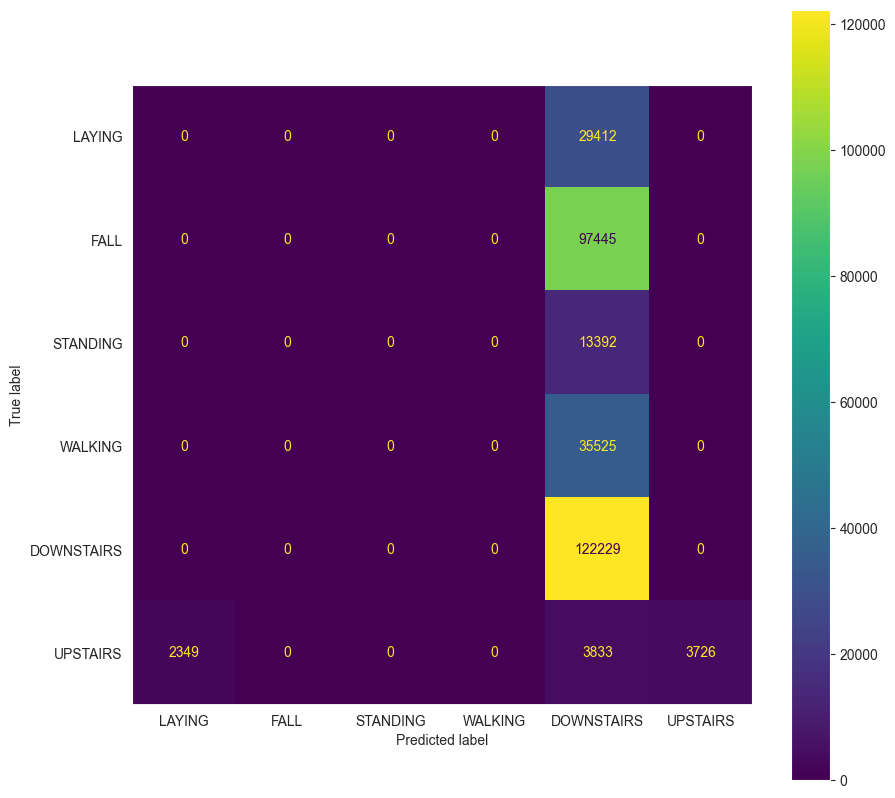

In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
evaluate_classification(lr, "Logistic Regression", X_train, X_test, y_train, y_test)

Training Accuracy LinearDiscriminantAnalysis is 41.150491747603894,  Test Accuracy LinearDiscriminantAnalysis is 41.262247857335396
Training Precesion LinearDiscriminantAnalysis is 41.150491747603894,  Test Accuracy LinearDiscriminantAnalysis is 41.262247857335396
Training Recall LinearDiscriminantAnalysis is 41.150491747603894,  Test Accuracy LinearDiscriminantAnalysis is 41.262247857335396


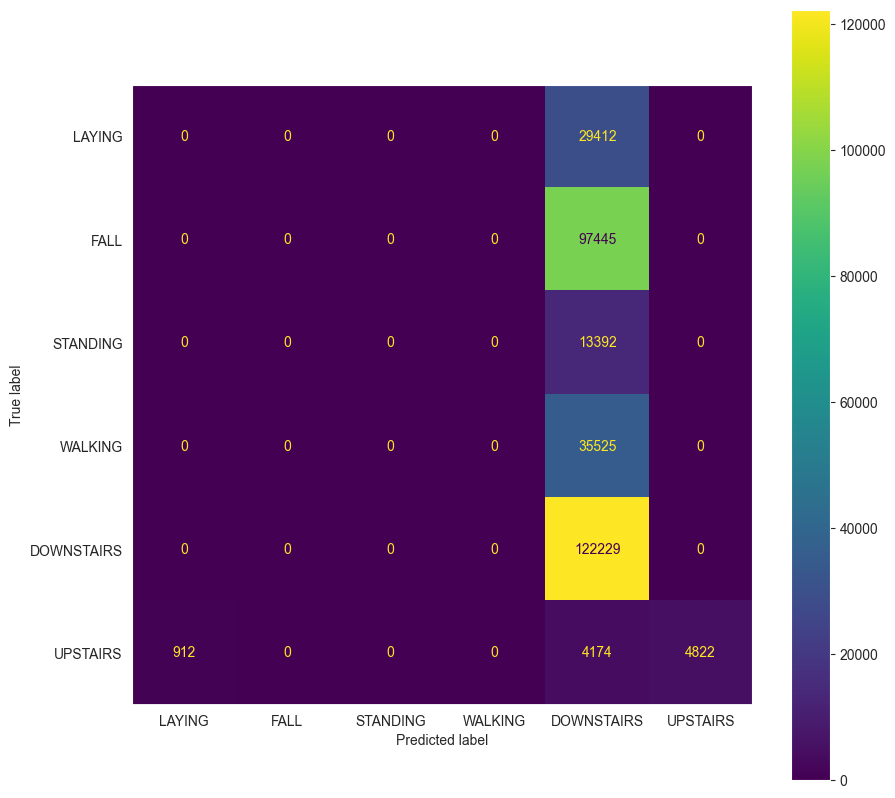

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis().fit(X_train, y_train)
evaluate_classification(lda, "LinearDiscriminantAnalysis", X_train, X_test, y_train, y_test)

In [11]:
import pandas as pd

# 판다스 Series로 변환
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

Training Accuracy KNeighborsClassifier is 41.69833170484566,  Test Accuracy KNeighborsClassifier is 41.698088083894376
Training Precesion KNeighborsClassifier is 41.69833170484566,  Test Accuracy KNeighborsClassifier is 41.698088083894376
Training Recall KNeighborsClassifier is 41.69833170484566,  Test Accuracy KNeighborsClassifier is 41.698088083894376


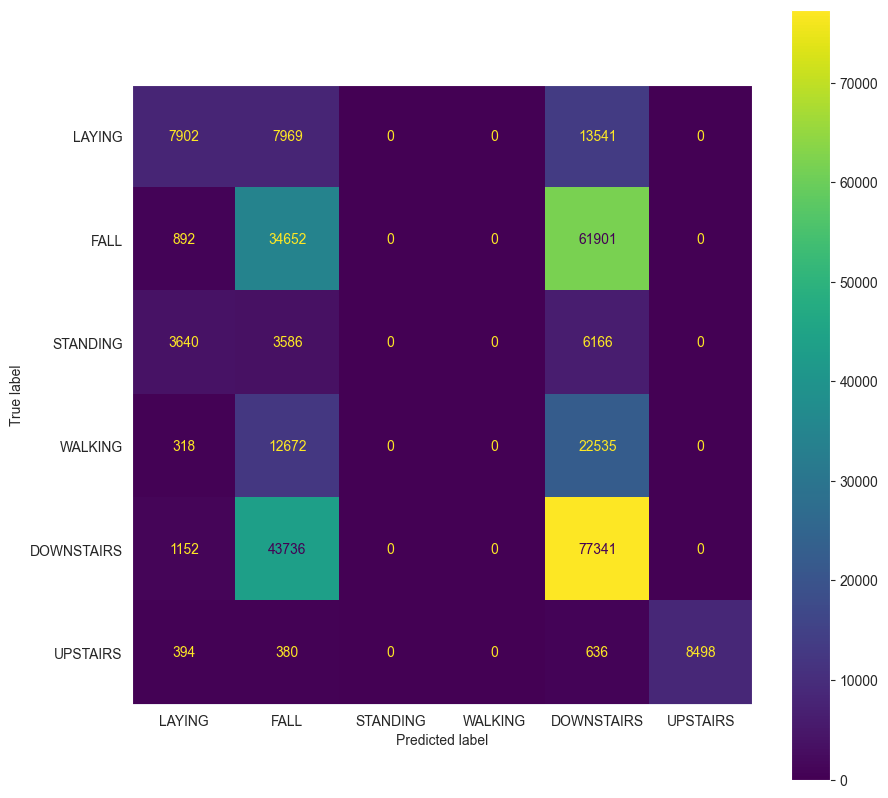

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=30).fit(X_train, y_train)
evaluate_classification(knn, "KNeighborsClassifier", X_train, X_test, y_train, y_test)

Training Accuracy GaussianNB is 44.4980778277923,  Test Accuracy GaussianNB is 44.59437954473858
Training Precesion GaussianNB is 44.4980778277923,  Test Accuracy GaussianNB is 44.59437954473858
Training Recall GaussianNB is 44.4980778277923,  Test Accuracy GaussianNB is 44.59437954473858


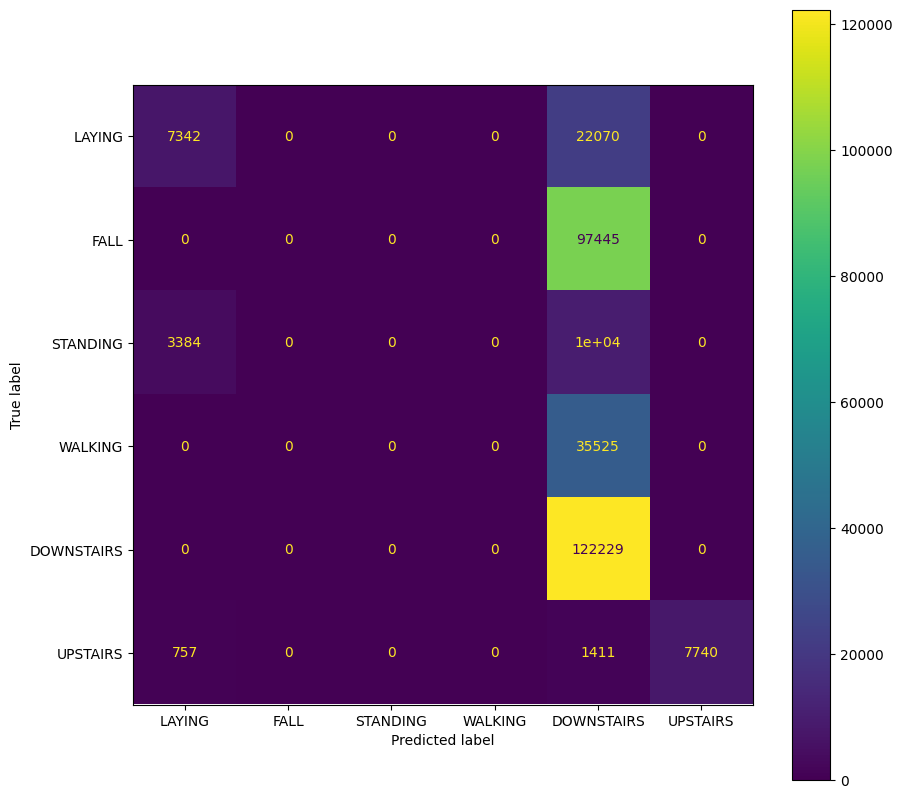

In [12]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train, y_train)
evaluate_classification(gnb, "GaussianNB", X_train, X_test, y_train, y_test)

D:\Danu\Project\venv2\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training Accuracy Linear SVC(LBasedImpl) is 40.76633568002583,  Test Accuracy Linear SVC(LBasedImpl) is 40.86960193042795
Training Precesion Linear SVC(LBasedImpl) is 40.76633568002583,  Test Accuracy Linear SVC(LBasedImpl) is 40.86960193042795
Training Recall Linear SVC(LBasedImpl) is 40.76633568002583,  Test Accuracy Linear SVC(LBasedImpl) is 40.86960193042795


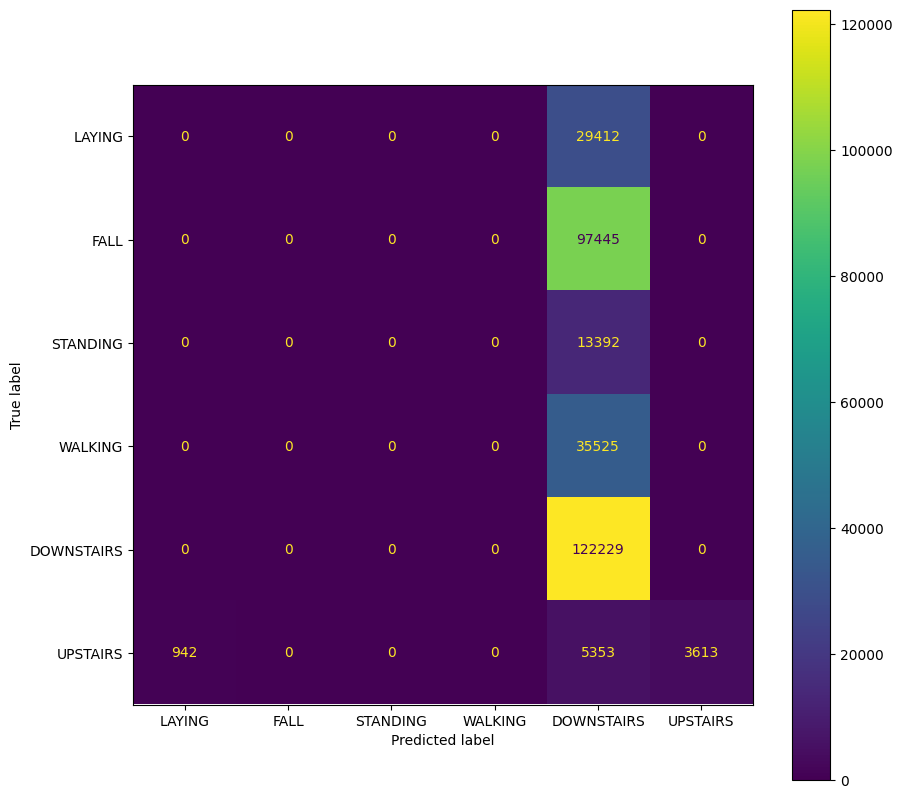

In [13]:
from sklearn import svm

lin_svc = svm.LinearSVC().fit(X_train, y_train)
evaluate_classification(lin_svc, "Linear SVC(LBasedImpl)", X_train, X_test, y_train, y_test)

Training Accuracy XGBClassifier is 44.71646220099157,  Test Accuracy XGBClassifier is 44.84055457583522
Training Precesion XGBClassifier is 44.71646220099157,  Test Accuracy XGBClassifier is 44.84055457583522
Training Recall XGBClassifier is 44.71646220099157,  Test Accuracy XGBClassifier is 44.84055457583522


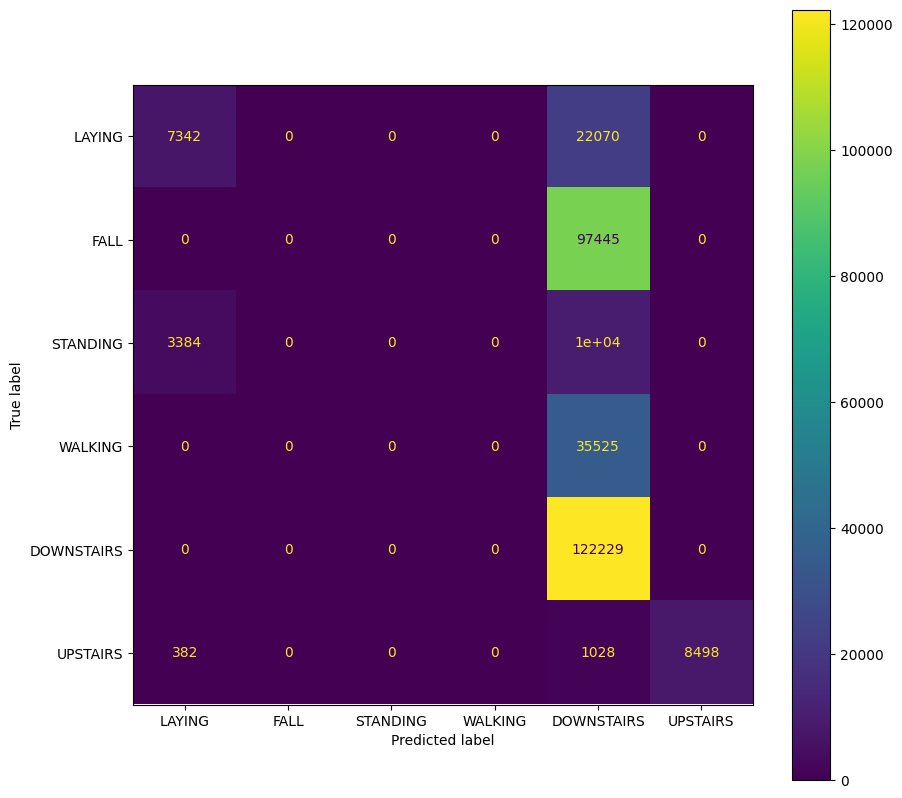

In [14]:
from sklearn import preprocessing
from xgboost import XGBClassifier

le = preprocessing.LabelEncoder().fit(y_train)
y_xgb_train = le.transform(y_train)
y_xgb_test = le.transform(y_test)
xgb = XGBClassifier().fit(X_train, y_xgb_train)
evaluate_classification(xgb, "XGBClassifier", X_train, X_test, y_xgb_train, y_xgb_test)

Training Accuracy XGBClassifier is 44.71646220099157,  Test Accuracy XGBClassifier is 44.84055457583522
Training Precesion XGBClassifier is 44.71646220099157,  Test Accuracy XGBClassifier is 44.84055457583522
Training Recall XGBClassifier is 44.71646220099157,  Test Accuracy XGBClassifier is 44.84055457583522


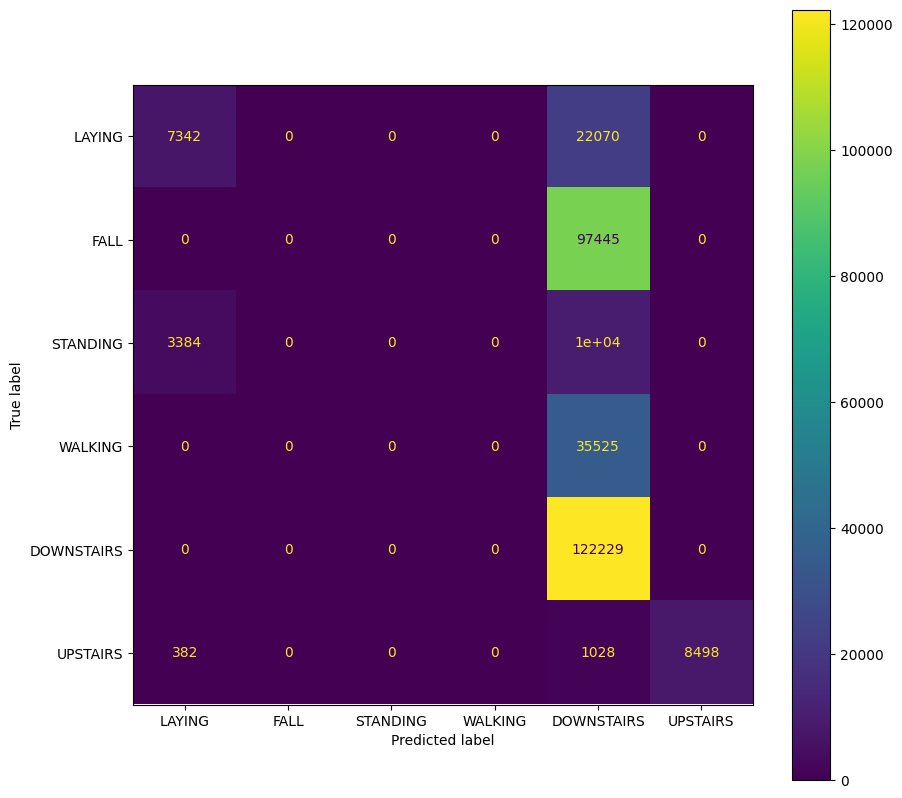

In [15]:
from sklearn import preprocessing
from xgboost import XGBClassifier

le = preprocessing.LabelEncoder().fit(y_train)
y_xgb_train = le.transform(y_train)
y_xgb_test = le.transform(y_test)
xgb_params = {'n_estimators': 100,
              'learning_rate': 0.2,
              'subsample': 0.927,
              'colsample_bytree': 0.88,
              'max_depth': 5,
              'booster': 'gbtree',
              'reg_lambda': 38,
              'reg_alpha': 32,
              'random_state': 12}
xgb = XGBClassifier(**xgb_params).fit(X_train, y_xgb_train)
evaluate_classification(xgb, "XGBClassifier", X_train, X_test, y_xgb_train, y_xgb_test)

In [ ]:
from sklearn import svm

rbf = svm.SVC(kernel='rbf').fit(X_train, y_train)
evaluate_classification(rbf, "RBF SVC", X_train, X_test, y_train, y_test)